In [338]:
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import preprocessing 

In [381]:
train=pd.read_csv('C:\\Users\\Vibhor Tyagi\\Desktop\\Data Science\\Train_data.csv')
test=pd.read_csv('C:\\Users\\Vibhor Tyagi\\Desktop\\Data Science\\Test_data.csv')
train.head(10)

,Unnamed: 0,code,clientType,registrationMode,planName,accident,duration,country,netSales,netProfit,gender,age
0,1,CBH,Basic,Offline,M,0,186,MALAYSIA,-29.0,9.57,F,81
1,2,CBH,Basic,Offline,M,0,186,MALAYSIA,-29.0,9.57,F,71
2,3,CWT,Basic,Online,Q,0,65,AUSTRALIA,-49.5,29.70,NaN,32
3,4,CWT,Basic,Online,Q,0,60,AUSTRALIA,-39.6,23.76,NaN,32
4,5,CWT,Basic,Online,Q,0,79,ITALY,-19.8,11.88,NaN,41
5,6,JZI,Premium,Online,Z,0,66,UNITED STATES,-121.0,42.35,F,44
6,7,CWT,Basic,Online,Q,0,63,AUSTRALIA,-108.9,65.34,NaN,29
7,8,CWT,Basic,Online,Q,0,57,THAILAND,-19.8,11.88,NaN,44
8,9,CWT,Basic,Online,Q,0,186,AUSTRALIA,-99.0,59.40,NaN,37
9,10,JZI,Premium,Online,I,0,33,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",-26.0,9.10,NaN,118


In [340]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60326 entries, 0 to 60325
Data columns (total 12 columns):
Unnamed: 0          60326 non-null int64
code                60326 non-null object
clientType          60326 non-null object
registrationMode    60326 non-null object
planName            60326 non-null object
accident            60326 non-null int64
duration            60326 non-null int64
country             60326 non-null object
netSales            60326 non-null float64
netProfit           60326 non-null float64
gender              17361 non-null object
age                 60326 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 5.5+ MB


In [384]:
train.isnull().sum()

Unnamed: 0              0
code                    0
clientType              0
registrationMode        0
planName                0
accident                0
duration                0
country                 0
netSales                0
netProfit               0
gender              42965
age                     0
dtype: int64

In [341]:
test.head()

,Unnamed: 0,code,clientType,registrationMode,planName,duration,country,netSales,netProfit,gender,age
0,42104,EPX,Basic,Online,B,24,INDIA,26.0,0.00,NaN,36
1,869,EPX,Basic,Online,K,52,SINGAPORE,11.0,0.00,NaN,36
2,57025,CWT,Basic,Online,Q,6,MALAYSIA,39.6,23.76,NaN,45
3,1148,EPX,Basic,Online,K,37,MALAYSIA,10.0,0.00,NaN,25
4,23356,CWT,Basic,Online,Q,77,JAPAN,29.7,17.82,NaN,59


In [342]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
Unnamed: 0          3000 non-null int64
code                3000 non-null object
clientType          3000 non-null object
registrationMode    3000 non-null object
planName            3000 non-null object
duration            3000 non-null int64
country             3000 non-null object
netSales            3000 non-null float64
netProfit           3000 non-null float64
gender              858 non-null object
age                 3000 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 257.9+ KB


In [343]:
# SINCE WE NEED TO LABEL THE CATEGORICAL VARIBALES IN THE SAME ORDER (IN BOTH TRAIN DATA AND TEST DATA), 
# I INTRODUCE ANOTHE TABLE WITH JOINED ROWS OF TRAIN AND TEST DATA.
# temp=pd.read_csv('C:\\Users\\Vibhor Tyagi\\Desktop\\Data Science\\temp.csv')

In [344]:
label_encoder = preprocessing.LabelEncoder() 

train['code']= label_encoder.fit_transform(train['code']) 
train['clientType']= label_encoder.fit_transform(train['clientType']) 
train['planName']= label_encoder.fit_transform(train['planName']) 
train['country']= label_encoder.fit_transform(train['country'])
train=train.drop(columns='gender')
train=train.drop(columns='registrationMode')


test['code']= label_encoder.fit_transform(test['code']) 
test['clientType']= label_encoder.fit_transform(test['clientType']) 
test['planName']= label_encoder.fit_transform(test['planName']) 
test['country']= label_encoder.fit_transform(test['country'])
test=test.drop(columns='gender')
test=test.drop(columns='registrationMode')


In [345]:

a=train['accident']
train=train.drop(columns='accident') 
train=train.drop(columns='code') 
train=train.drop(columns='planName') 
train=train.drop(columns='country') 

train=train.join(a)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60326 entries, 0 to 60325
Data columns (total 7 columns):
Unnamed: 0    60326 non-null int64
clientType    60326 non-null int32
duration      60326 non-null int64
netSales      60326 non-null float64
netProfit     60326 non-null float64
age           60326 non-null int64
accident      60326 non-null int64
dtypes: float64(2), int32(1), int64(4)
memory usage: 3.0 MB


In [346]:
test=test.drop(columns='code')
test=test.drop(columns='planName')
test=test.drop(columns='country') 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
Unnamed: 0    3000 non-null int64
clientType    3000 non-null int32
duration      3000 non-null int64
netSales      3000 non-null float64
netProfit     3000 non-null float64
age           3000 non-null int64
dtypes: float64(2), int32(1), int64(3)
memory usage: 129.0 KB


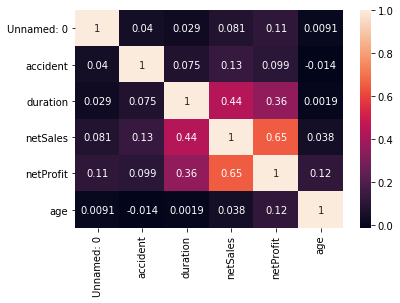

In [389]:
sns.heatmap(train.corr(),annot = True)

In [372]:
array = train.values

x_train =array[: , 0:6]
y_train =array[ : ,6]

x_test = test.values

# APPLYING ML ALGORITHM: 

## Decision Trees

In [378]:
cl = DecisionTreeClassifier()
cl = cl.fit(x_train,y_train)
y_pred = cl.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [385]:
np.unique(y_pred)

array([0., 1.])

In [377]:
len(y_pred)

3000